In [1]:

import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import tensorflow as tf
import keras

import pydot
import graphviz

from tensorflow import keras
from tensorflow.keras.utils import plot_model


In [ ]:
!pip install opencv-python

In [2]:
x_pred = "C:/Users/Ahmed/Downloads/archive (22)/seg_pred/seg_pred"
for filename in os.listdir(x_pred):
    if filename.endswith(".jpg"):  
        image = cv2.imread(os.path.join(x_pred, filename))

In [3]:
x_test = 'C:/Users/Ahmed/Downloads/archive (22)/seg_test/seg_test'
for filename in os.listdir(x_test):
    if filename.endswith(".jpg"):  
        image = cv2.imread(os.path.join(x_test, filename))

In [4]:
x_train = 'C:/Users/Ahmed/Downloads/archive (22)/seg_train/seg_train'
for filename in os.listdir(x_train):
    if filename.endswith(".jpg"):  
        image = cv2.imread(os.path.join(x_train, filename))

In [5]:
counter =0
x_pred = "C:/Users/Ahmed/Downloads/archive (22)/seg_pred/seg_pred"
for filename in os.listdir(x_pred):
    if filename.endswith(".jpg"):  
        counter = counter+1
print(counter)

7301


In [6]:
x_train = 'C:/Users/Ahmed/Downloads/archive (22)/seg_train'
for folder in  os.listdir(x_train + '/seg_train') : 
    files = gb.glob(pathname= str( x_train +'/seg_train//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 2191 in folder buildings
For training data , found 2271 in folder forest
For training data , found 2404 in folder glacier
For training data , found 2512 in folder mountain
For training data , found 2274 in folder sea
For training data , found 2382 in folder street


In [7]:
x_test = 'C:/Users/Ahmed/Downloads/archive (22)/seg_test'
for folder in  os.listdir(x_test +'\seg_test') : 
    files = gb.glob(pathname= str( x_test +'\seg_test//' + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 437 in folder buildings
For testing data , found 474 in folder forest
For testing data , found 553 in folder glacier
For testing data , found 525 in folder mountain
For testing data , found 510 in folder sea
For testing data , found 501 in folder street


In [8]:
x_pred = "C:/Users/Ahmed/Downloads/archive (22)/seg_pred"
files = gb.glob(pathname= str(x_pred+'\seg_pred/*.jpg'))
print(f'For Prediction data , found {len(files)}')

For Prediction data , found 7301


In [9]:
# dictionary
code = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}
# code.items()   -> return    buildings : 0
# buildings    x
# 0            y
# send 3 & recieive mountain 
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    

In [10]:
size = []
for folder in  os.listdir(x_train +'\seg_train') : 
    files = gb.glob(pathname= str( x_train +'\seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    13986
(113, 150, 3)        7
(111, 150, 3)        3
(135, 150, 3)        3
(146, 150, 3)        2
(136, 150, 3)        2
(144, 150, 3)        2
(134, 150, 3)        2
(108, 150, 3)        2
(123, 150, 3)        2
(143, 150, 3)        2
(142, 150, 3)        2
(133, 150, 3)        1
(145, 150, 3)        1
(76, 150, 3)         1
(147, 150, 3)        1
(119, 150, 3)        1
(102, 150, 3)        1
(105, 150, 3)        1
(110, 150, 3)        1
(120, 150, 3)        1
(100, 150, 3)        1
(131, 150, 3)        1
(103, 150, 3)        1
(97, 150, 3)         1
(149, 150, 3)        1
(141, 150, 3)        1
(140, 150, 3)        1
(124, 150, 3)        1
(115, 150, 3)        1
(81, 150, 3)         1
dtype: int64

In [11]:
size = []
for folder in  os.listdir(x_test +'\seg_test') : 
    files = gb.glob(pathname= str( x_test +'\seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    2993
(141, 150, 3)       1
(110, 150, 3)       1
(149, 150, 3)       1
(131, 150, 3)       1
(72, 150, 3)        1
(76, 150, 3)        1
(81, 150, 3)        1
dtype: int64

In [12]:
size = []
files = gb.glob(pathname= str(x_pred +'\seg_pred/*.jpg'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    7288
(100, 150, 3)       1
(112, 150, 3)       1
(129, 150, 3)       1
(139, 150, 3)       1
(126, 150, 3)       1
(374, 500, 3)       1
(143, 150, 3)       1
(124, 150, 3)       1
(149, 150, 3)       1
(144, 150, 3)       1
(131, 150, 3)       1
(133, 150, 3)       1
(108, 150, 3)       1
dtype: int64

In [13]:
s = 100

In [14]:
#read all images & convert it into arrays

In [15]:
X_train = []
y_train = []
for folder in  os.listdir(x_train +'\seg_train') : 
    files = gb.glob(pathname= str( x_train +'\seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        # make x train and append first image
        X_train.append(list(image_array))
        #code[mountain]   -> return 3
        y_train.append(code[folder])

In [16]:
print(f'we have {len(X_train)} items in X_train')

we have 14034 items in X_train


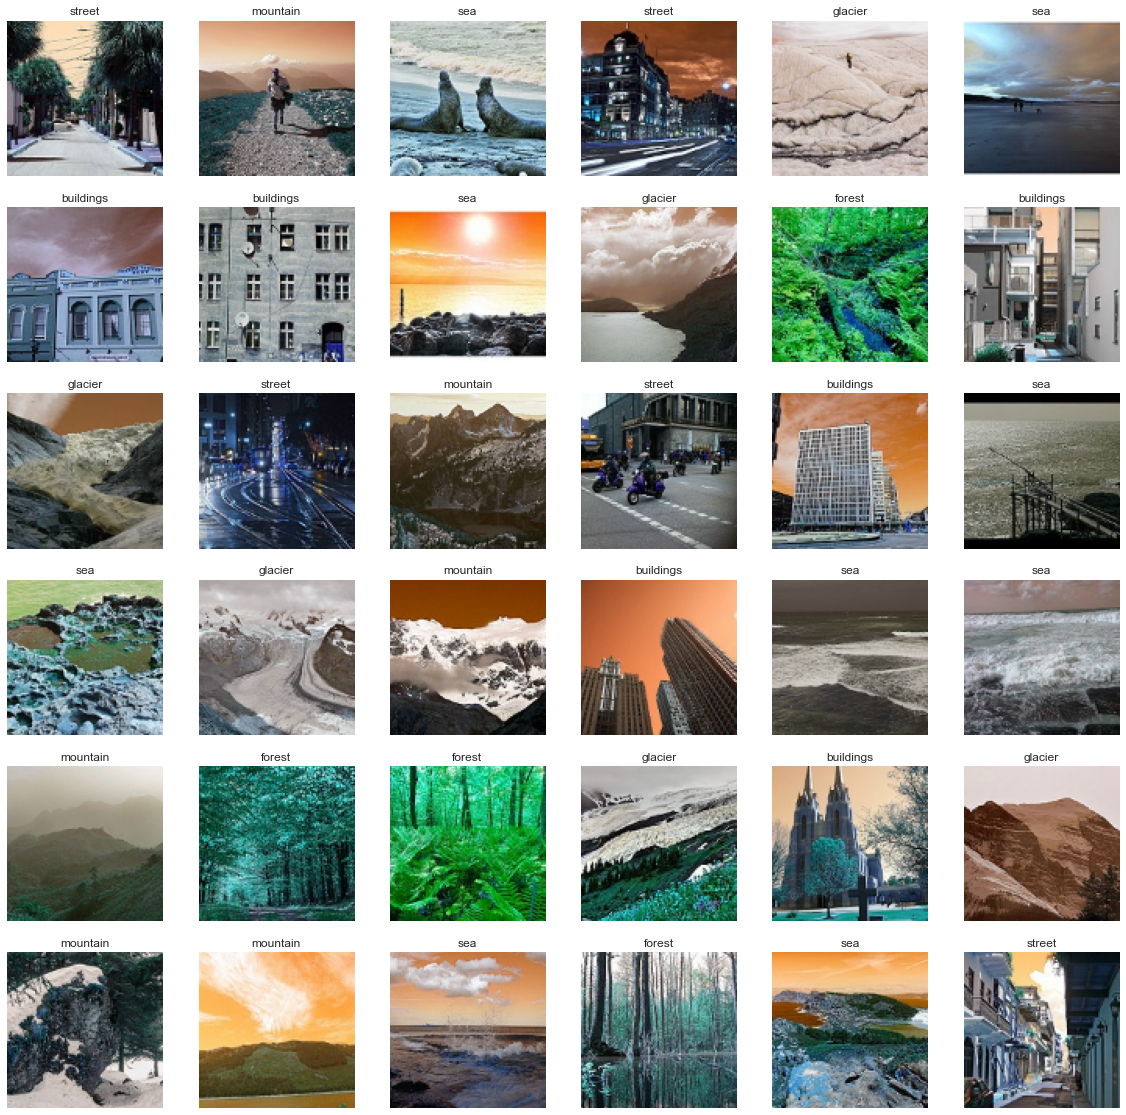

In [17]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))
    ###########################
  

In [18]:
X_test = []
y_test = []
for folder in  os.listdir(x_test +'\seg_test') : 
    files = gb.glob(pathname= str(x_test + '\seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])

In [19]:
print(f'we have {len(X_test)} items in X_test')

we have 3000 items in X_test


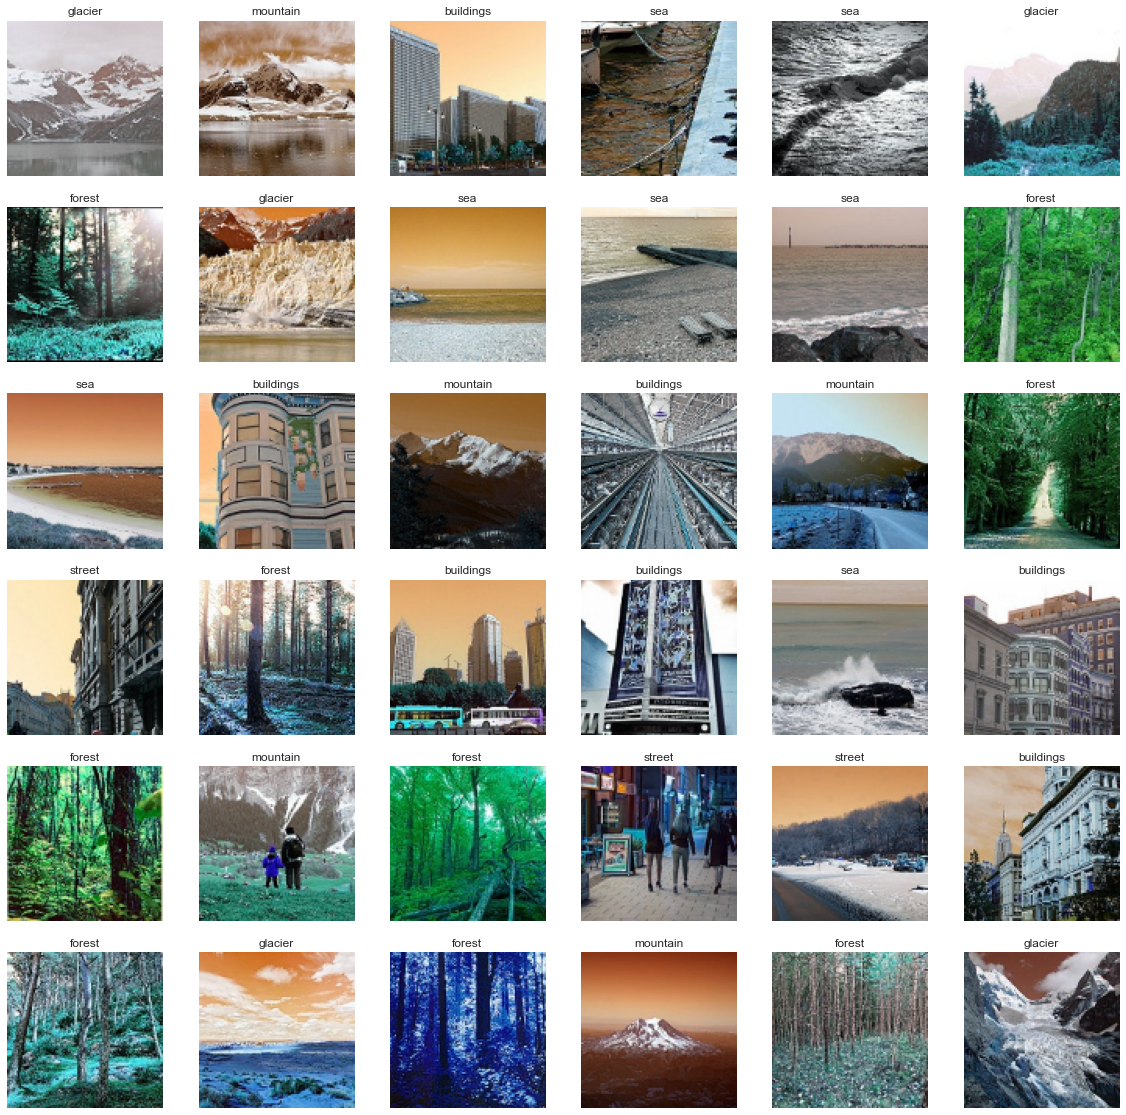

In [20]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [21]:
X_pred = []
files = gb.glob(pathname= str(x_pred + '\seg_pred/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))
    X_pred.append(list(image_array))  

In [22]:
print(f'we have {len(X_pred)} items in X_pred')

we have 7301 items in X_pred


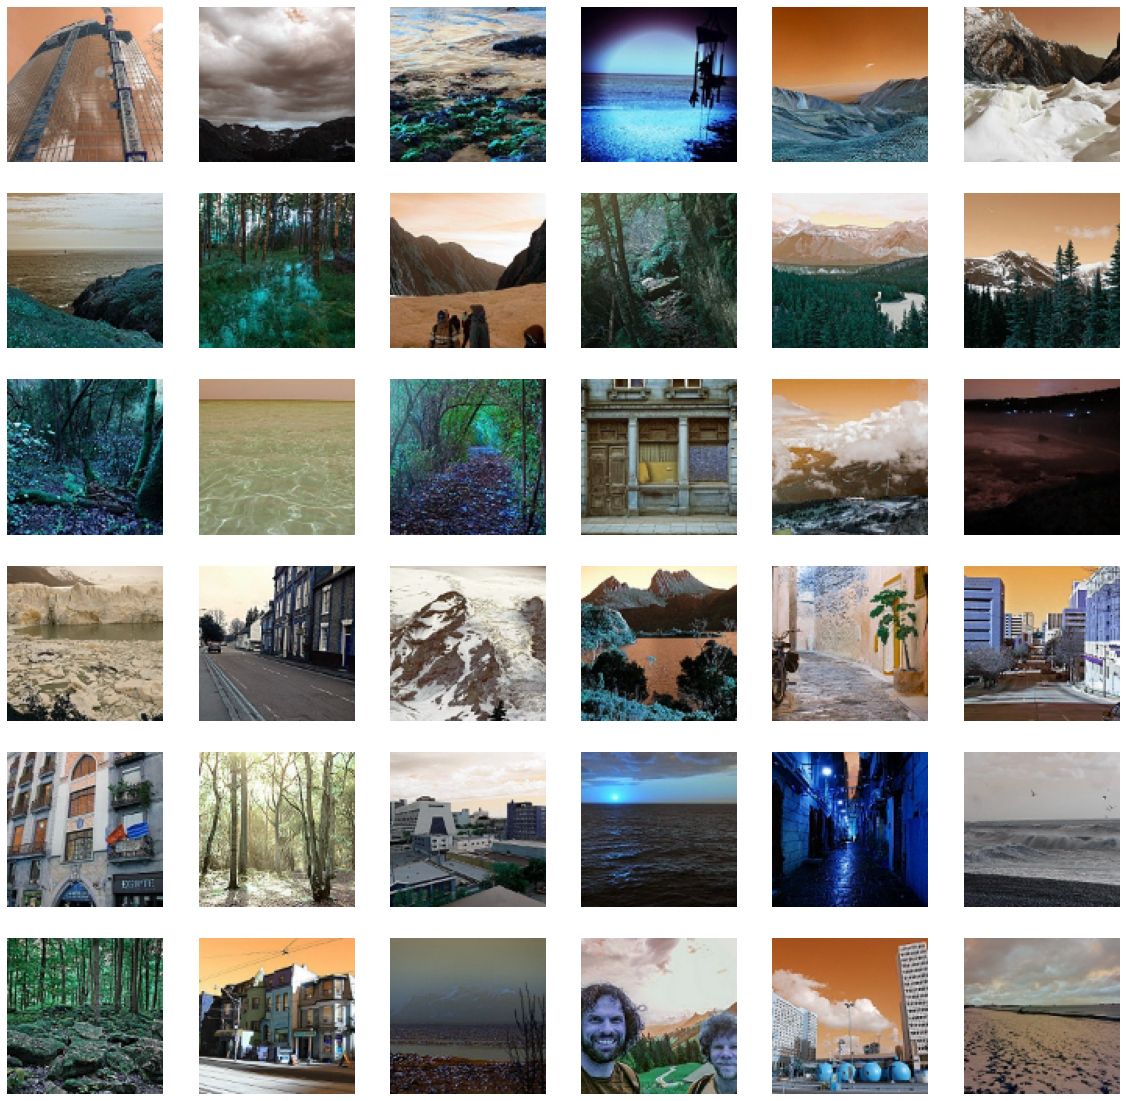

In [23]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

In [24]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (14034, 100, 100, 3)
X_test shape  is (3000, 100, 100, 3)
X_pred shape  is (7301, 100, 100, 3)
y_train shape  is (14034,)
y_test shape  is (3000,)


In [26]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(6,activation='softmax') ,    
        ])

In [36]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [37]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 200)       5600      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 150)       270150    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 150)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 120)       162120    
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 80)        86480     
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 50)        36050     
                                   

In [38]:
epochs = 50
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=64,verbose=1)

Epoch 1/50
220/220 [==============================] - 1937s 9s/step - loss: 1.5256 - accuracy: 0.4151
Epoch 2/50
220/220 [==============================] - 1593s 7s/step - loss: 1.0804 - accuracy: 0.5648
Epoch 3/50
220/220 [==============================] - 1454s 7s/step - loss: 0.9631 - accuracy: 0.6306
Epoch 4/50
220/220 [==============================] - 1496s 7s/step - loss: 0.8476 - accuracy: 0.6912
Epoch 5/50
220/220 [==============================] - 1503s 7s/step - loss: 0.7768 - accuracy: 0.7263
Epoch 6/50
220/220 [==============================] - 1667s 8s/step - loss: 0.7079 - accuracy: 0.7619
Epoch 7/50
220/220 [==============================] - 1824s 8s/step - loss: 0.6597 - accuracy: 0.7789
Epoch 8/50
220/220 [==============================] - 1736s 8s/step - loss: 0.6243 - accuracy: 0.7879
Epoch 9/50
220/220 [==============================] - 1719s 8s/step - loss: 0.5799 - accuracy: 0.8043
Epoch 10/50
220/220 [==============================] - 2003s 9s/step - loss: 0.538

In [41]:
KerasModel.save('save_model.h5')

In [25]:
model_test=tf.keras.models.load_model('save_model.h5')
model_test.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 200)       5600      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 150)       270150    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 150)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 120)       162120    
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 80)        86480     
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 50)        36050     
                                                        

In [26]:
ModelLoss, ModelAccuracy = model_test.evaluate(X_test, y_test)


print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))




94/94 [==============================] - 70s 745ms/step - loss: 1.5459 - accuracy: 0.8153
Test Loss is 1.5459431409835815
Test Accuracy is 0.8153333067893982


In [27]:
y_pred = model_test.predict(X_test)
print('Prediction Shape is {}'.format(y_pred.shape))





94/94 [==============================] - 64s 684ms/step
Prediction Shape is (3000, 6)


In [28]:

y_result = model_test.predict(X_pred_array)
print('Prediction Shape is {}'.format(y_result.shape))






229/229 [==============================] - 157s 687ms/step
Prediction Shape is (7301, 6)


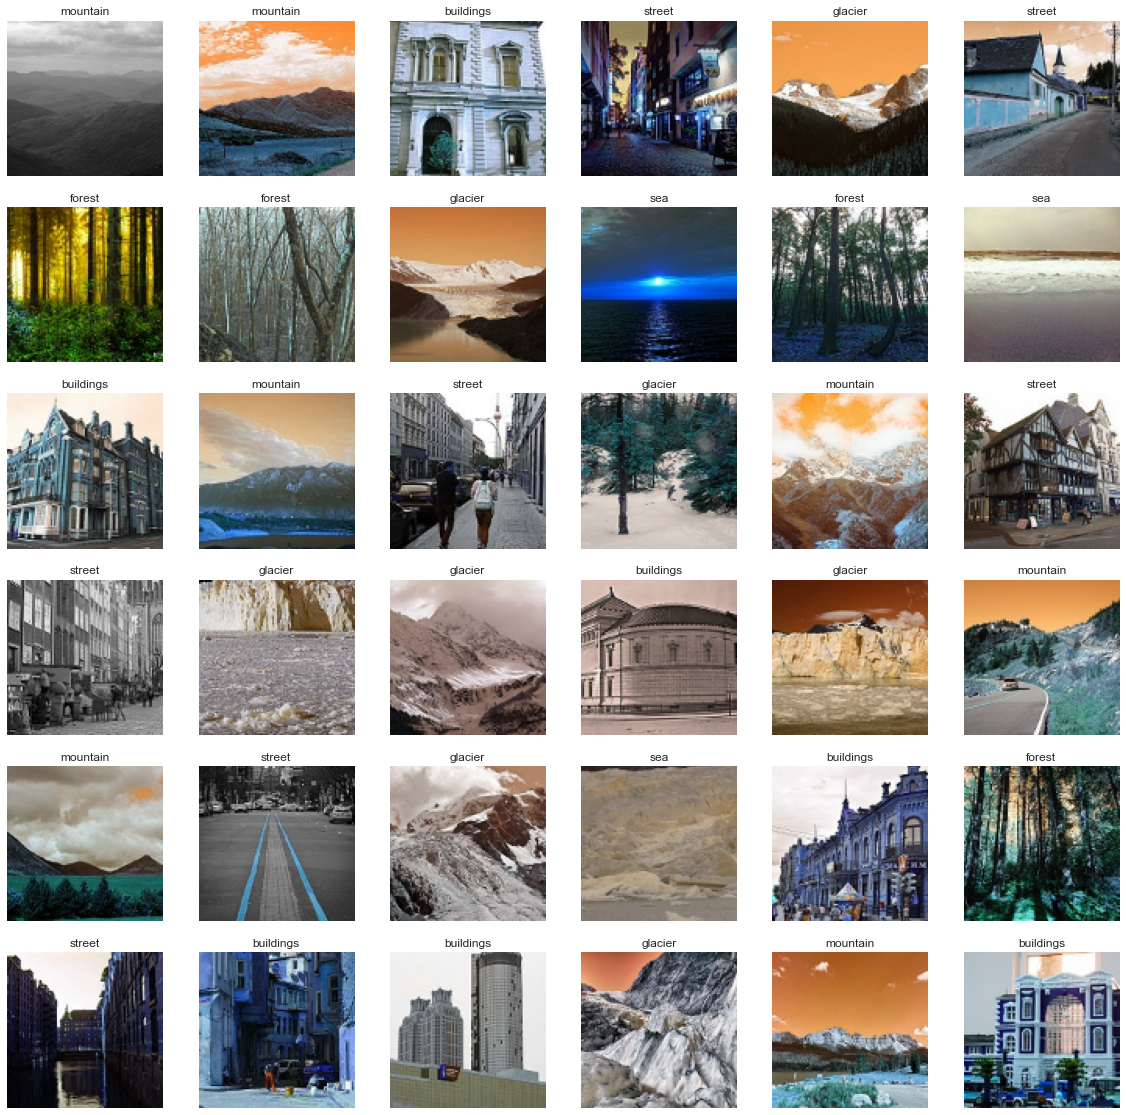

In [29]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))

In [36]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [30]:
tf.keras.utils.plot_model(model_test)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [45]:
pip install graphviz pydot

Note: you may need to restart the kernel to use updated packages.
